In [5]:
import pandas as pd

df = pd.read_csv("data/dataframe.csv")
df.head()

from sklearn.model_selection import train_test_split

X = df.drop("y", axis=1).values
y = df["y"].values

In [6]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X, y)

oversampler = RandomOverSampler(random_state=42)
X_res, y_res = oversampler.fit_resample(X,y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 42, test_size = 0.33)

In [4]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(criterion = "entropy", n_estimators = 30)
#model.fit(X_train, y_train)

#print(model.score(X_test, y_test))

0.9287079510703364


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

model = RandomForestClassifier()

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,20,30,40,50],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3],
              'criterion': ["entropy","gini","log_loss"]
           }

grid = GridSearchCV(model,param_grid=grid_space,cv=3,scoring="f1_micro",verbose=10, n_jobs=-1)

# Enable verbose logging using joblib
joblib.parallel_backend('threading')

model_grid = grid.fit(X_train,y_train)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
[CV 1/3; 1/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 3/3; 1/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 2/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 2/3; 2/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 3/3; 2/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 1/3; 3/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30
[CV 2/3; 3/2160] START criterion=entrop

[CV 1/3; 9/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.592 total time=   0.5s
[CV 1/3; 12/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20
[CV 2/3; 9/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.573 total time=   0.5s
[CV 2/3; 12/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20
[CV 2/3; 11/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.399 total time=   0.1s
[CV 3/3; 12/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20
[CV 3/3; 11/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=

[CV 1/3; 21/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.374 total time=   0.1s
[CV 3/3; 21/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 14/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.640 total time=   0.5s
[CV 1/3; 22/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 21/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.339 total time=   0.1s
[CV 2/3; 22/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 3/3; 14/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, scor

[CV 3/3; 32/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3; 33/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=30
[CV 1/3; 33/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 2/3; 33/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=30
[CV 2/3; 33/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 3/3; 33/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=30
[CV 3/3; 33/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=30;, score=nan 

[CV 3/3; 41/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.368 total time=   0.1s
[CV 3/3; 42/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=20
[CV 3/3; 39/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.567 total time=   0.5s
[CV 1/3; 43/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30
[CV 2/3; 39/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.554 total time=   0.6s
[CV 2/3; 43/2160] START criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30
[CV 1/3; 40/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, scor

[CV 3/3; 51/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.476 total time=   0.1s
[CV 2/3; 53/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 1/3; 45/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.598 total time=   0.7s
[CV 3/3; 53/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 2/3; 45/2160] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.565 total time=   0.7s
[CV 1/3; 54/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/3; 52/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, scor

[CV 1/3; 66/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.474 total time=   0.1s
[CV 3/3; 66/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 59/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.617 total time=   0.6s
[CV 1/3; 67/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 66/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.526 total time=   0.1s
[CV 2/3; 67/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 59/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, scor

[CV 2/3; 80/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 80/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=50
[CV 3/3; 80/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 81/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 3/3; 73/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.630 total time=   1.5s
[CV 2/3; 81/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 81/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.

[CV 3/3; 85/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.646 total time=   1.7s
[CV 2/3; 90/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/3; 88/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.649 total time=   1.0s
[CV 3/3; 90/2160] START criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 88/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.586 total time=   1.0s
[CV 1/3; 91/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 91/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, scor

[CV 3/3; 90/2160] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.655 total time=   1.7s
[CV 2/3; 100/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 98/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.666 total time=   1.0s
[CV 3/3; 100/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 98/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.705 total time=   1.0s
[CV 1/3; 101/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 98/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, s

[CV 1/3; 111/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.596 total time=   0.3s
[CV 3/3; 111/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/3; 111/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.551 total time=   0.3s
[CV 1/3; 112/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 1/3; 104/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.687 total time=   1.5s
[CV 2/3; 112/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 104/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40

[CV 3/3; 118/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.710 total time=   1.1s
[CV 2/3; 126/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 126/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.591 total time=   0.3s
[CV 3/3; 126/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 119/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.675 total time=   1.4s
[CV 1/3; 127/2160] START criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 126/2160] END criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10

[CV 2/3; 139/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3; 139/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40
[CV 3/3; 139/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 140/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 1/3; 140/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 140/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 2/3; 140/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, sco

[CV 1/3; 147/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.687 total time=   0.6s
[CV 2/3; 149/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40
[CV 3/3; 147/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.668 total time=   0.7s
[CV 3/3; 149/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40
[CV 2/3; 147/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.638 total time=   0.7s
[CV 1/3; 150/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 3/3; 145/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50

[CV 2/3; 157/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.650 total time=   0.6s
[CV 3/3; 159/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 3/3; 157/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.713 total time=   0.6s
[CV 1/3; 160/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 150/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.658 total time=   1.5s
[CV 2/3; 160/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 158/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=30

[CV 3/3; 163/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.684 total time=   1.0s
[CV 2/3; 171/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 171/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.585 total time=   0.3s
[CV 3/3; 171/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 164/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.668 total time=   1.2s
[CV 1/3; 172/2160] START criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 171/2160] END criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10

[CV 1/3; 182/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3; 182/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 2/3; 182/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3; 182/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 3/3; 182/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3; 183/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30
[CV 1/3; 183/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30;, sco

[CV 2/3; 189/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.617 total time=   1.6s
[CV 3/3; 192/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20
[CV 3/3; 189/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.676 total time=   1.6s
[CV 1/3; 193/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30
[CV 3/3; 191/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.424 total time=   0.3s
[CV 2/3; 193/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30
[CV 1/3; 190/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50

[CV 3/3; 194/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.694 total time=   1.2s
[CV 1/3; 203/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 3/3; 201/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.425 total time=   0.2s
[CV 2/3; 203/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 1/3; 195/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.679 total time=   1.4s
[CV 3/3; 203/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 3/3; 202/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20

[CV 3/3; 208/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.624 total time=   0.8s
[CV 2/3; 216/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 216/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.462 total time=   0.2s
[CV 3/3; 216/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 216/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.515 total time=   0.2s
[CV 1/3; 217/2160] START criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 1/3; 209/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40

[CV 1/3; 223/2160] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.630 total time=   0.9s
[CV 1/3; 226/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 226/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 226/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 226/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3; 226/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 3/3; 226/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, s

[CV 1/3; 233/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.738 total time=   0.8s
[CV 3/3; 235/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 233/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.705 total time=   0.8s
[CV 1/3; 236/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 2/3; 233/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.689 total time=   0.9s
[CV 2/3; 236/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 2/3; 236/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10

[CV 1/3; 245/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 245/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 2/3; 245/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 245/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 3/3; 245/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 246/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/3; 238/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, sco

[CV 2/3; 250/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.758 total time=   3.0s
[CV 1/3; 255/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/3; 253/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.710 total time=   2.1s
[CV 2/3; 255/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/3; 250/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.725 total time=   3.4s
[CV 3/3; 255/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 253/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30

[CV 3/3; 255/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.740 total time=   3.9s
[CV 2/3; 265/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/3; 263/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.673 total time=   1.7s
[CV 3/3; 265/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 263/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.703 total time=   1.6s
[CV 1/3; 266/2160] START criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 1/3; 266/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10

[CV 3/3; 268/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.697 total time=   1.4s
[CV 2/3; 276/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 276/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.695 total time=   0.4s
[CV 3/3; 276/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 276/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.695 total time=   0.4s
[CV 1/3; 277/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/3; 269/2160] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=40

[CV 3/3; 289/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 290/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 1/3; 290/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 290/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 2/3; 290/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 290/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 3/3; 290/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, sco

[CV 3/3; 295/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.736 total time=   1.9s
[CV 2/3; 300/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/3; 298/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.729 total time=   1.0s
[CV 3/3; 300/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 298/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.717 total time=   1.0s
[CV 1/3; 301/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 301/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10

[CV 1/3; 308/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.723 total time=   1.0s
[CV 3/3; 310/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 308/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.745 total time=   1.0s
[CV 1/3; 311/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 308/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.683 total time=   1.0s
[CV 2/3; 311/2160] START criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 1/3; 311/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10

[CV 3/3; 313/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.725 total time=   1.0s
[CV 2/3; 321/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 321/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.704 total time=   0.2s
[CV 3/3; 321/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 314/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.724 total time=   1.2s
[CV 1/3; 322/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/3; 314/2160] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40

[CV 2/3; 334/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3; 334/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40
[CV 3/3; 334/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 335/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 1/3; 335/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 335/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 2/3; 335/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, sco

[CV 2/3; 340/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.776 total time=   2.8s
[CV 2/3; 344/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 2/3; 342/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.705 total time=   1.3s
[CV 3/3; 344/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 3/3; 342/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.745 total time=   1.2s
[CV 1/3; 345/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/3; 340/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50

[CV 2/3; 352/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.756 total time=   1.1s
[CV 3/3; 354/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 3/3; 352/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.731 total time=   1.0s
[CV 1/3; 355/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 3/3; 345/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.759 total time=   2.8s
[CV 2/3; 355/2160] START criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/3; 353/2160] END criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30

[CV 2/3; 364/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3; 364/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=40
[CV 3/3; 364/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 365/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 1/3; 365/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 365/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 2/3; 365/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=5

[CV 1/3; 372/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.745 total time=   0.7s
[CV 2/3; 374/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=40
[CV 2/3; 372/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.703 total time=   0.7s
[CV 3/3; 374/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=40
[CV 3/3; 372/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.708 total time=   0.7s
[CV 1/3; 375/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 3/3; 370/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estima

[CV 2/3; 375/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.777 total time=   1.7s
[CV 3/3; 384/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 3/3; 382/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.686 total time=   0.8s
[CV 1/3; 385/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 375/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.762 total time=   2.0s
[CV 2/3; 385/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 383/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 3/3; 388/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.679 total time=   1.0s
[CV 2/3; 396/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 396/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.620 total time=   0.2s
[CV 3/3; 396/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 396/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.647 total time=   0.2s
[CV 1/3; 397/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 1/3; 389/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estima

[CV 1/3; 403/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.702 total time=   1.1s
[CV 3/3; 405/2160] START criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 403/2160] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.722 total time=   1.3s
[CV 1/3; 406/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 406/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 406/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 406/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimato

[CV 1/3; 413/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.779 total time=   1.7s
[CV 3/3; 415/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 413/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.771 total time=   1.5s
[CV 1/3; 416/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 413/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.781 total time=   1.5s
[CV 2/3; 416/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 1/3; 416/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estima

[CV 3/3; 425/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 426/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/3; 418/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.783 total time=   1.3s
[CV 2/3; 426/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 426/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.735 total time=   0.2s
[CV 3/3; 426/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 419/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimato

[CV 2/3; 433/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.772 total time=   1.6s
[CV 3/3; 435/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/3; 433/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.749 total time=   1.7s
[CV 1/3; 436/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 436/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 436/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 2/3; 436/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimato

[CV 1/3; 443/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.749 total time=   1.2s
[CV 3/3; 445/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 443/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.765 total time=   1.2s
[CV 1/3; 446/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 1/3; 446/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.722 total time=   0.3s
[CV 2/3; 446/2160] START criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 443/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estima

[CV 3/3; 448/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.771 total time=   1.0s
[CV 2/3; 456/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 456/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.748 total time=   0.3s
[CV 3/3; 456/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 449/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.752 total time=   1.2s
[CV 1/3; 457/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/3; 449/2160] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estima

[CV 1/3; 463/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.789 total time=   1.3s
[CV 3/3; 465/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 463/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.811 total time=   1.3s
[CV 1/3; 466/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 466/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 466/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 466/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimato

[CV 3/3; 465/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.811 total time=   2.3s
[CV 2/3; 475/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 473/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.777 total time=   1.3s
[CV 3/3; 475/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 473/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.803 total time=   1.3s
[CV 1/3; 476/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 1/3; 476/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estima

[CV 3/3; 478/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.797 total time=   1.8s
[CV 2/3; 486/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 486/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.750 total time=   0.5s
[CV 3/3; 486/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 486/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.760 total time=   0.5s
[CV 1/3; 487/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 479/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estima

[CV 1/3; 493/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.779 total time=   1.4s
[CV 3/3; 495/2160] START criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 493/2160] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.792 total time=   1.3s
[CV 1/3; 496/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 496/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 496/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 496/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimato

[CV 1/3; 503/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.799 total time=   1.3s
[CV 3/3; 505/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 503/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.827 total time=   1.3s
[CV 1/3; 506/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 503/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.808 total time=   1.2s
[CV 2/3; 506/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 1/3; 506/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estima

[CV 3/3; 508/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.818 total time=   1.3s
[CV 2/3; 516/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 516/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.781 total time=   0.3s
[CV 3/3; 516/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 509/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.818 total time=   1.7s
[CV 1/3; 517/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 509/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estima

[CV 1/3; 523/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.815 total time=   1.8s
[CV 3/3; 525/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 523/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.811 total time=   1.8s
[CV 1/3; 526/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 526/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 526/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 2/3; 526/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimato

[CV 1/3; 533/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.796 total time=   1.3s
[CV 3/3; 535/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 533/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.804 total time=   1.3s
[CV 1/3; 536/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 533/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.804 total time=   1.2s
[CV 2/3; 536/2160] START criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 1/3; 536/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estima

[CV 3/3; 538/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.806 total time=   1.2s
[CV 2/3; 546/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 546/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.879 total time=   0.4s
[CV 3/3; 546/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 539/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.809 total time=   1.6s
[CV 1/3; 547/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/3; 539/2160] END criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, 

[CV 1/3; 553/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.898 total time=   1.9s
[CV 3/3; 555/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 553/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.909 total time=   1.9s
[CV 1/3; 556/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 556/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 556/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 556/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split

[CV 1/3; 563/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.783 total time=   1.4s
[CV 1/3; 565/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 563/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.802 total time=   1.4s
[CV 2/3; 565/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 563/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.805 total time=   1.5s
[CV 3/3; 565/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 564/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_spl

[CV 3/3; 568/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.793 total time=   1.0s
[CV 2/3; 576/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 576/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.460 total time=   0.2s
[CV 3/3; 576/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 576/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.662 total time=   0.2s
[CV 1/3; 577/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 1/3; 569/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_spl

[CV 1/3; 583/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.709 total time=   0.8s
[CV 3/3; 585/2160] START criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 583/2160] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.784 total time=   0.9s
[CV 1/3; 586/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 586/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 586/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 586/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split

[CV 3/3; 592/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.910 total time=   1.1s
[CV 2/3; 595/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 593/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.895 total time=   1.7s
[CV 3/3; 595/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 593/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.906 total time=   1.8s
[CV 1/3; 596/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 593/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_spl

[CV 3/3; 598/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.910 total time=   1.9s
[CV 2/3; 606/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 606/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.805 total time=   0.3s
[CV 3/3; 606/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/3; 606/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.794 total time=   0.3s
[CV 1/3; 607/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 3/3; 606/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_spl

[CV 2/3; 613/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.838 total time=   1.2s
[CV 1/3; 616/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 616/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 616/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 2/3; 616/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3; 616/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 3/3; 616/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=1

[CV 3/3; 615/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.835 total time=   2.1s
[CV 2/3; 625/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/3; 623/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.782 total time=   1.1s
[CV 3/3; 625/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 623/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.789 total time=   1.2s
[CV 1/3; 626/2160] START criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 623/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_spl

[CV 1/3; 636/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.889 total time=   0.5s
[CV 3/3; 636/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 629/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.806 total time=   1.4s
[CV 1/3; 637/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/3; 629/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.806 total time=   1.4s
[CV 2/3; 637/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/3; 629/2160] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_spl

[CV 1/3; 646/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 646/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 646/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3; 646/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 3/3; 646/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3; 647/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20
[CV 1/3; 647/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, 

[CV 2/3; 653/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.869 total time=   1.7s
[CV 3/3; 655/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 645/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.915 total time=   4.0s
[CV 1/3; 656/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 3/3; 653/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.866 total time=   1.6s
[CV 2/3; 656/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 1/3; 656/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_spl

[CV 1/3; 666/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.785 total time=   0.3s
[CV 2/3; 666/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 3/3; 658/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.851 total time=   1.5s
[CV 3/3; 666/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 659/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.845 total time=   1.7s
[CV 1/3; 667/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 666/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_spl

[CV 1/3; 673/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.810 total time=   1.2s
[CV 3/3; 675/2160] START criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 673/2160] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.846 total time=   1.2s
[CV 1/3; 676/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 676/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 676/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 676/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split

[CV 3/3; 682/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.911 total time=   1.3s
[CV 1/3; 685/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 682/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.914 total time=   1.4s
[CV 2/3; 685/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 683/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.904 total time=   2.1s
[CV 3/3; 685/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 683/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_spl

[CV 3/3; 694/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 695/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 1/3; 695/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 695/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 2/3; 695/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 695/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 3/3; 695/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, 

[CV 3/3; 702/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.864 total time=   1.1s
[CV 2/3; 704/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 1/3; 700/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.862 total time=   2.6s
[CV 3/3; 704/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 3/3; 700/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.866 total time=   2.5s
[CV 1/3; 705/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 700/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_spl

[CV 1/3; 712/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.838 total time=   1.3s
[CV 3/3; 713/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 2/3; 712/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.843 total time=   1.2s
[CV 1/3; 714/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 1/3; 705/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.861 total time=   3.4s
[CV 2/3; 714/2160] START criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 3/3; 712/2160] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_spl

[CV 1/3; 723/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 2/3; 723/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30
[CV 2/3; 723/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 3/3; 723/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30
[CV 3/3; 723/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 1/3; 724/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=40
[CV 1/3; 724/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   

[CV 3/3; 729/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.593 total time=   1.7s
[CV 2/3; 733/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30
[CV 1/3; 732/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.508 total time=   0.7s
[CV 3/3; 733/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30
[CV 2/3; 732/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.489 total time=   0.7s
[CV 1/3; 734/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=40
[CV 3/3; 732/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.506 total 

[CV 1/3; 742/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.456 total time=   0.6s
[CV 3/3; 743/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 1/3; 735/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.529 total time=   1.6s
[CV 1/3; 744/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/3; 735/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.601 total time=   1.5s
[CV 2/3; 744/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/3; 742/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.471 total 

[CV 2/3; 755/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 755/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=50
[CV 3/3; 755/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 756/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 3/3; 748/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.563 total time=   0.9s
[CV 2/3; 756/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 756/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.390 total time

[CV 3/3; 760/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.587 total time=   1.5s
[CV 2/3; 765/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/3; 763/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.521 total time=   1.0s
[CV 3/3; 765/2160] START criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 763/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.584 total time=   1.0s
[CV 1/3; 766/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 766/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total ti

[CV 3/3; 772/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.522 total time=   1.0s
[CV 1/3; 775/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 765/2160] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.582 total time=   2.0s
[CV 2/3; 775/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 773/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.626 total time=   1.3s
[CV 3/3; 775/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 773/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.632 total 

[CV 3/3; 784/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 785/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 1/3; 785/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 785/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 2/3; 785/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 785/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 3/3; 785/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   

[CV 2/3; 792/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.575 total time=   0.6s
[CV 3/3; 794/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 3/3; 792/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.564 total time=   0.6s
[CV 1/3; 795/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/3; 790/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.665 total time=   1.4s
[CV 2/3; 795/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 793/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.599 total 

[CV 3/3; 802/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.546 total time=   0.6s
[CV 1/3; 805/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 3/3; 795/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.642 total time=   1.4s
[CV 2/3; 805/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/3; 803/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.624 total time=   0.9s
[CV 3/3; 805/2160] START criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 803/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.581 total 

[CV 3/3; 808/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.641 total time=   1.0s
[CV 2/3; 816/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 816/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.559 total time=   0.3s
[CV 3/3; 816/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 809/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.594 total time=   1.2s
[CV 1/3; 817/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/3; 809/2160] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.657 total 

[CV 2/3; 823/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.641 total time=   0.8s
[CV 1/3; 826/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 826/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 826/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 826/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3; 826/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 3/3; 826/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time= 

[CV 1/3; 833/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.621 total time=   1.2s
[CV 3/3; 835/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 833/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.660 total time=   1.4s
[CV 1/3; 836/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 3/3; 833/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.597 total time=   1.4s
[CV 2/3; 836/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 1/3; 836/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.542 total 

[CV 3/3; 838/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.621 total time=   1.0s
[CV 2/3; 846/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 846/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.560 total time=   0.2s
[CV 3/3; 846/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 846/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.560 total time=   0.2s
[CV 1/3; 847/2160] START criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 839/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.684 total 

[CV 2/3; 853/2160] END criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.664 total time=   1.2s
[CV 1/3; 856/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 856/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 856/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 856/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3; 856/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 3/3; 856/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time= 

[CV 1/3; 863/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.619 total time=   1.0s
[CV 3/3; 865/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 863/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.646 total time=   0.9s
[CV 1/3; 866/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 863/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.616 total time=   0.9s
[CV 2/3; 866/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 1/3; 866/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.528 total 

[CV 3/3; 868/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.640 total time=   1.0s
[CV 2/3; 876/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 876/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.555 total time=   0.2s
[CV 3/3; 876/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/3; 876/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.597 total time=   0.2s
[CV 1/3; 877/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 1/3; 869/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.627 total 

[CV 2/3; 889/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3; 889/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40
[CV 3/3; 889/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 890/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50
[CV 1/3; 890/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 890/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50
[CV 2/3; 890/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   

[CV 2/3; 897/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20;, score=0.635 total time=   0.7s
[CV 3/3; 899/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40
[CV 3/3; 897/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20;, score=0.630 total time=   0.7s
[CV 1/3; 900/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 3/3; 895/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.615 total time=   1.8s
[CV 2/3; 900/2160] START criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/3; 898/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.653 total 

[CV 2/3; 907/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.608 total time=   0.5s
[CV 3/3; 909/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/3; 900/2160] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.665 total time=   1.5s
[CV 1/3; 910/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 907/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.552 total time=   0.6s
[CV 2/3; 910/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 908/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.637 total 

[CV 3/3; 913/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.599 total time=   0.9s
[CV 2/3; 921/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 921/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.423 total time=   0.2s
[CV 3/3; 921/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 914/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.626 total time=   1.1s
[CV 1/3; 922/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 921/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.525 total 

[CV 3/3; 928/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.641 total time=   0.8s
[CV 2/3; 936/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 936/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.464 total time=   0.2s
[CV 3/3; 936/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 936/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.535 total time=   0.2s
[CV 1/3; 937/2160] START criterion=gini, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 929/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.633 total 

[CV 2/3; 950/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 950/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 3/3; 950/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 951/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 943/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.554 total time=   0.9s
[CV 2/3; 951/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 944/2160] END criterion=gini, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.633 total time

[CV 2/3; 958/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.673 total time=   1.1s
[CV 3/3; 960/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 1/3; 958/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.671 total time=   1.2s
[CV 1/3; 961/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 961/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 961/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 961/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time

[CV 1/3; 968/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.667 total time=   0.9s
[CV 3/3; 970/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 968/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.689 total time=   1.0s
[CV 1/3; 971/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 3/3; 968/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.716 total time=   0.9s
[CV 2/3; 971/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 1/3; 971/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.579 total 

[CV 2/3; 980/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 980/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=50
[CV 3/3; 980/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 981/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 3/3; 973/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.653 total time=   0.9s
[CV 2/3; 981/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 981/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.649 total time

[CV 1/3; 988/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.654 total time=   0.9s
[CV 3/3; 990/2160] START criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 988/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.646 total time=   0.9s
[CV 1/3; 991/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 991/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 991/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 991/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time

[CV 3/3; 990/2160] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.659 total time=   1.5s
[CV 2/3; 1000/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 998/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.706 total time=   0.9s
[CV 3/3; 1000/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 998/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.698 total time=   0.9s
[CV 1/3; 1001/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 998/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.703 tot

[CV 1/3; 1011/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.553 total time=   0.2s
[CV 3/3; 1011/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1004/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.685 total time=   1.3s
[CV 1/3; 1012/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 1004/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.723 total time=   1.2s
[CV 2/3; 1012/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 1011/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.642

[CV 2/3; 1025/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1025/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50
[CV 3/3; 1025/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1026/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 3/3; 1018/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.705 total time=   1.4s
[CV 2/3; 1026/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1026/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.647 tot

[CV 2/3; 1033/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.693 total time=   1.0s
[CV 3/3; 1035/2160] START criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/3; 1033/2160] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.688 total time=   1.1s
[CV 1/3; 1036/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 1036/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1036/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1036/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan tot

[CV 2/3; 1043/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.706 total time=   1.1s
[CV 3/3; 1045/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1043/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.692 total time=   1.2s
[CV 1/3; 1046/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 1043/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.705 total time=   1.2s
[CV 2/3; 1046/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 1/3; 1046/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.623

[CV 3/3; 1048/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.699 total time=   1.1s
[CV 2/3; 1056/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1056/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.684 total time=   0.2s
[CV 3/3; 1056/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1049/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.708 total time=   1.3s
[CV 1/3; 1057/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 1056/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.700

[CV 2/3; 1068/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 3/3; 1068/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30
[CV 3/3; 1068/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 1/3; 1069/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40
[CV 1/3; 1069/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3; 1069/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40
[CV 2/3; 1069/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total t

[CV 3/3; 1074/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.723 total time=   1.4s
[CV 2/3; 1078/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30
[CV 1/3; 1075/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.736 total time=   1.6s
[CV 3/3; 1078/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30
[CV 2/3; 1075/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.738 total time=   1.6s
[CV 1/3; 1079/2160] START criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40
[CV 1/3; 1077/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20;, score=0.687

[CV 1/3; 1080/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.735 total time=   1.6s
[CV 3/3; 1088/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 2/3; 1080/2160] END criterion=gini, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.758 total time=   1.6s
[CV 1/3; 1089/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/3; 1087/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.701 total time=   0.7s
[CV 2/3; 1089/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 2/3; 1087/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=

[CV 2/3; 1098/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 3/3; 1098/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=30
[CV 3/3; 1098/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 1/3; 1099/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=40
[CV 1/3; 1099/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3; 1099/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=40
[CV 2/3; 1099/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan 

[CV 1/3; 1105/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.697 total time=   1.4s
[CV 3/3; 1108/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=30
[CV 1/3; 1107/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.593 total time=   0.6s
[CV 1/3; 1109/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 2/3; 1105/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.699 total time=   1.4s
[CV 2/3; 1109/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 3/3; 1107/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, scor

[CV 1/3; 1110/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.717 total time=   1.5s
[CV 3/3; 1118/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 1/3; 1117/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.668 total time=   0.6s
[CV 1/3; 1119/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 2/3; 1110/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.727 total time=   1.6s
[CV 2/3; 1119/2160] START criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 2/3; 1117/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, scor

[CV 3/3; 1123/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.681 total time=   1.5s
[CV 2/3; 1131/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1131/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.717 total time=   0.6s
[CV 3/3; 1131/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 1124/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.649 total time=   1.9s
[CV 1/3; 1132/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/3; 1124/2160] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, scor

[CV 2/3; 1144/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3; 1144/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=40
[CV 3/3; 1144/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 1145/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 1/3; 1145/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 1145/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 2/3; 1145/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan 

[CV 3/3; 1152/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.743 total time=   0.6s
[CV 3/3; 1154/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 2/3; 1152/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.714 total time=   0.6s
[CV 1/3; 1155/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/3; 1150/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.759 total time=   1.8s
[CV 2/3; 1155/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/3; 1153/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, scor

[CV 1/3; 1162/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.723 total time=   0.6s
[CV 2/3; 1164/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 2/3; 1162/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.717 total time=   0.6s
[CV 3/3; 1164/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 3/3; 1162/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.701 total time=   0.6s
[CV 1/3; 1165/2160] START criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 3/3; 1155/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, scor

[CV 3/3; 1168/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.755 total time=   1.3s
[CV 2/3; 1176/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1176/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.756 total time=   0.4s
[CV 3/3; 1176/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 1176/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.764 total time=   0.4s
[CV 1/3; 1177/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/3; 1169/2160] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, scor

[CV 2/3; 1190/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1190/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 3/3; 1190/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1191/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/3; 1183/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.777 total time=   1.1s
[CV 2/3; 1191/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1191/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.

[CV 3/3; 1195/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.784 total time=   1.9s
[CV 2/3; 1200/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/3; 1198/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.759 total time=   1.1s
[CV 3/3; 1200/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 1198/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.777 total time=   1.1s
[CV 1/3; 1201/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 1201/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, scor

[CV 1/3; 1208/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.775 total time=   1.1s
[CV 3/3; 1210/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 1208/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.785 total time=   1.1s
[CV 1/3; 1211/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 1208/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.786 total time=   1.1s
[CV 2/3; 1211/2160] START criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 1/3; 1211/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, scor

[CV 3/3; 1213/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.787 total time=   1.1s
[CV 2/3; 1221/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1221/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.775 total time=   0.3s
[CV 3/3; 1221/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1214/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.774 total time=   1.3s
[CV 1/3; 1222/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/3; 1214/2160] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, scor

[CV 2/3; 1228/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.808 total time=   1.5s
[CV 1/3; 1231/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 1231/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1231/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 1231/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3; 1231/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 3/3; 1231/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=na

[CV 1/3; 1238/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.784 total time=   1.2s
[CV 3/3; 1240/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1238/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.806 total time=   1.2s
[CV 1/3; 1241/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 3/3; 1238/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.792 total time=   1.2s
[CV 2/3; 1241/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 1/3; 1241/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, scor

[CV 3/3; 1243/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.784 total time=   1.2s
[CV 2/3; 1251/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1251/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.749 total time=   0.3s
[CV 3/3; 1251/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 1251/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.757 total time=   0.3s
[CV 1/3; 1252/2160] START criterion=gini, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 3/3; 1244/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, scor

[CV 1/3; 1265/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 1265/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 2/3; 1265/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1265/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 3/3; 1265/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1266/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 1258/2160] END criterion=gini, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;

[CV 3/3; 1270/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.907 total time=   3.7s
[CV 2/3; 1275/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 1/3; 1273/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.891 total time=   2.2s
[CV 3/3; 1275/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 1273/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.903 total time=   2.3s
[CV 1/3; 1276/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 1276/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estima

[CV 1/3; 1283/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.753 total time=   1.0s
[CV 1/3; 1285/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1283/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.788 total time=   1.1s
[CV 2/3; 1285/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1275/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.906 total time=   3.2s
[CV 3/3; 1285/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 1283/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 3/3; 1288/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.749 total time=   1.0s
[CV 2/3; 1296/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1296/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.645 total time=   0.2s
[CV 3/3; 1296/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 1296/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.600 total time=   0.2s
[CV 1/3; 1297/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 1/3; 1289/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estima

[CV 1/3; 1303/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.705 total time=   0.8s
[CV 3/3; 1305/2160] START criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 1303/2160] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.679 total time=   0.8s
[CV 1/3; 1306/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 1306/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1306/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1306/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimato

[CV 1/3; 1313/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.896 total time=   1.4s
[CV 3/3; 1315/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1313/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.907 total time=   1.5s
[CV 1/3; 1316/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 1313/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.907 total time=   1.5s
[CV 2/3; 1316/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 1/3; 1316/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estima

[CV 1/3; 1325/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 1325/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 2/3; 1325/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1325/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 3/3; 1325/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1326/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/3; 1318/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=3

[CV 1/3; 1330/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.829 total time=   1.9s
[CV 3/3; 1334/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 2/3; 1330/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.827 total time=   1.9s
[CV 1/3; 1335/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/3; 1333/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.830 total time=   1.1s
[CV 2/3; 1335/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/3; 1330/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 3/3; 1335/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.820 total time=   1.8s
[CV 3/3; 1344/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 3/3; 1342/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.782 total time=   0.8s
[CV 1/3; 1345/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 1335/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.843 total time=   1.9s
[CV 2/3; 1345/2160] START criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/3; 1343/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estima

[CV 1/3; 1355/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 1355/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 2/3; 1355/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1355/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 3/3; 1355/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1356/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 1348/2160] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=3

[CV 2/3; 1360/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.910 total time=   3.6s
[CV 1/3; 1365/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 3/3; 1360/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.912 total time=   3.6s
[CV 2/3; 1365/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 1/3; 1363/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.891 total time=   2.2s
[CV 3/3; 1365/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 1363/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estima

[CV 3/3; 1372/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.830 total time=   0.8s
[CV 3/3; 1374/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/3; 1365/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.912 total time=   3.2s
[CV 1/3; 1375/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1373/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.854 total time=   1.2s
[CV 2/3; 1375/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 1373/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 3/3; 1378/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.842 total time=   1.2s
[CV 2/3; 1386/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1386/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.790 total time=   0.3s
[CV 3/3; 1386/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 1386/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.817 total time=   0.3s
[CV 1/3; 1387/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 1/3; 1379/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estima

[CV 1/3; 1393/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.821 total time=   1.1s
[CV 3/3; 1395/2160] START criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 1393/2160] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.814 total time=   1.2s
[CV 1/3; 1396/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 1396/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1396/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1396/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimato

[CV 3/3; 1402/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.917 total time=   1.3s
[CV 2/3; 1405/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1403/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.904 total time=   2.0s
[CV 3/3; 1405/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1403/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.914 total time=   2.1s
[CV 1/3; 1406/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 1403/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estima

[CV 3/3; 1408/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.910 total time=   2.1s
[CV 2/3; 1416/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1416/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.824 total time=   0.3s
[CV 3/3; 1416/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/3; 1416/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.856 total time=   0.3s
[CV 1/3; 1417/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 3/3; 1416/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/3; 1423/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.852 total time=   1.4s
[CV 1/3; 1426/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 1426/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1426/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 2/3; 1426/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3; 1426/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 3/3; 1426/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators

[CV 1/3; 1433/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.819 total time=   1.2s
[CV 3/3; 1435/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 1433/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.841 total time=   1.3s
[CV 1/3; 1436/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 1433/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.837 total time=   1.2s
[CV 2/3; 1436/2160] START criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 1/3; 1436/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estima

[CV 1/3; 1446/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.362 total time=   0.2s
[CV 2/3; 1446/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 1438/2160] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.840 total time=   1.5s
[CV 3/3; 1446/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 1446/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.372 total time=   0.3s
[CV 1/3; 1447/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/3; 1446/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_

[CV 1/3; 1453/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.552 total time=   0.9s
[CV 3/3; 1455/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 1453/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.586 total time=   0.9s
[CV 1/3; 1456/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 1456/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1456/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 1456/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_e

[CV 3/3; 1455/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.641 total time=   1.4s
[CV 2/3; 1465/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 1463/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.541 total time=   0.8s
[CV 3/3; 1465/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1463/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.473 total time=   0.8s
[CV 1/3; 1466/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 3/3; 1463/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n

[CV 1/3; 1476/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.362 total time=   0.2s
[CV 3/3; 1476/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 1476/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.497 total time=   0.2s
[CV 1/3; 1477/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 1469/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.555 total time=   1.1s
[CV 2/3; 1477/2160] START criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 1/3; 1469/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n

[CV 3/3; 1490/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1491/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 1483/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.544 total time=   0.9s
[CV 2/3; 1491/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1491/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.557 total time=   0.2s
[CV 3/3; 1491/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 1484/2160] END criterion=log_loss, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_e

[CV 1/3; 1498/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.613 total time=   1.0s
[CV 3/3; 1500/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 1498/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.644 total time=   1.0s
[CV 1/3; 1501/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 1501/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1501/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 1501/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=1, n_e

[CV 3/3; 1500/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.635 total time=   1.9s
[CV 2/3; 1510/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 1508/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.633 total time=   1.3s
[CV 3/3; 1510/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1508/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.658 total time=   1.3s
[CV 1/3; 1511/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 3/3; 1508/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n

[CV 3/3; 1513/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.676 total time=   1.0s
[CV 2/3; 1521/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1521/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.515 total time=   0.3s
[CV 3/3; 1521/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 1521/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.475 total time=   0.2s[CV 1/3; 1514/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.602 total time=   1.2s
[CV 1/3; 1522/2160] START criterion=log_loss, max_depth=3, max_features=3, min_sample

[CV 2/3; 1528/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.604 total time=   0.9s
[CV 3/3; 1530/2160] START criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/3; 1528/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.575 total time=   1.0s
[CV 1/3; 1531/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 1531/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1531/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1531/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=1, n_e

[CV 3/3; 1537/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.626 total time=   0.6s
[CV 1/3; 1540/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1530/2160] END criterion=log_loss, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.619 total time=   1.3s
[CV 2/3; 1540/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1538/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.650 total time=   0.9s
[CV 3/3; 1540/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1538/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n

[CV 1/3; 1551/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.633 total time=   0.2s
[CV 3/3; 1551/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/3; 1551/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.515 total time=   0.2s
[CV 1/3; 1552/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 1/3; 1544/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.711 total time=   1.3s
[CV 2/3; 1552/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 1544/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=3, n

[CV 2/3; 1565/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1565/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50
[CV 3/3; 1565/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1566/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 3/3; 1558/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.671 total time=   0.9s
[CV 2/3; 1566/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1566/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=2, n_est

[CV 1/3; 1573/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.657 total time=   1.5s
[CV 3/3; 1575/2160] START criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 1573/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.695 total time=   1.4s
[CV 1/3; 1576/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 1576/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1576/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1576/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_e

[CV 3/3; 1582/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.671 total time=   0.7s
[CV 1/3; 1585/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1575/2160] END criterion=log_loss, max_depth=3, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.697 total time=   1.9s
[CV 2/3; 1585/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1583/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.661 total time=   1.1s
[CV 3/3; 1585/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1583/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n

[CV 3/3; 1595/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1596/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/3; 1588/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.678 total time=   0.9s
[CV 2/3; 1596/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1596/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.583 total time=   0.2s
[CV 3/3; 1596/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/3; 1596/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_e

[CV 3/3; 1600/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.698 total time=   1.6s
[CV 2/3; 1605/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/3; 1603/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.700 total time=   0.9s
[CV 3/3; 1605/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 1603/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.683 total time=   1.0s
[CV 1/3; 1606/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 1606/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=1, n

[CV 1/3; 1613/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.679 total time=   1.0s
[CV 3/3; 1615/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 1613/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.636 total time=   1.0s
[CV 1/3; 1616/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 1613/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.671 total time=   0.9s
[CV 2/3; 1616/2160] START criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 1/3; 1616/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n

[CV 3/3; 1618/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.676 total time=   1.1s
[CV 2/3; 1626/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1626/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.491 total time=   0.3s
[CV 3/3; 1626/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1619/2160] END criterion=log_loss, max_depth=3, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.694 total time=   1.4s
[CV 1/3; 1627/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/3; 1626/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=2, n

[CV 1/3; 1633/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.670 total time=   1.0s
[CV 3/3; 1635/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 1633/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.698 total time=   1.0s
[CV 1/3; 1636/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 1636/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1636/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 1636/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=1, n_e

[CV 1/3; 1643/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.581 total time=   0.8s
[CV 3/3; 1645/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1643/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.636 total time=   0.8s
[CV 1/3; 1646/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 3/3; 1643/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.654 total time=   0.9s
[CV 2/3; 1646/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 1/3; 1646/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n

[CV 1/3; 1656/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.564 total time=   0.3s
[CV 3/3; 1656/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 1656/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.447 total time=   0.2s
[CV 1/3; 1657/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 1649/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.607 total time=   1.3s
[CV 2/3; 1657/2160] START criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 3/3; 1649/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n

[CV 3/3; 1663/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.671 total time=   0.8s
[CV 2/3; 1671/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1671/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.667 total time=   0.2s
[CV 3/3; 1671/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1664/2160] END criterion=log_loss, max_depth=5, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.648 total time=   1.1s
[CV 1/3; 1672/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/3; 1671/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n

[CV 1/3; 1678/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.716 total time=   0.9s
[CV 3/3; 1680/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 1678/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.682 total time=   0.9s
[CV 1/3; 1681/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 1681/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1681/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 1681/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=1, n_e

[CV 3/3; 1680/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.727 total time=   2.0s
[CV 2/3; 1690/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 1688/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.691 total time=   1.4s
[CV 3/3; 1690/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1688/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.689 total time=   1.5s
[CV 1/3; 1691/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=10
[CV 3/3; 1688/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n

[CV 3/3; 1700/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1701/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 3/3; 1693/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.721 total time=   1.0s
[CV 2/3; 1701/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1701/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.606 total time=   0.2s
[CV 3/3; 1701/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1694/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_e

[CV 1/3; 1708/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.667 total time=   0.9s
[CV 3/3; 1710/2160] START criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 1708/2160] END criterion=log_loss, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.711 total time=   1.0s
[CV 1/3; 1711/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 1711/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1711/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1711/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_e

[CV 1/3; 1718/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.729 total time=   1.0s
[CV 3/3; 1720/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1718/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.739 total time=   1.0s
[CV 1/3; 1721/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 1718/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.716 total time=   0.9s
[CV 2/3; 1721/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 1/3; 1721/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n

[CV 3/3; 1723/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.733 total time=   0.9s
[CV 2/3; 1731/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1731/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.644 total time=   0.2s
[CV 3/3; 1731/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1724/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40;, score=0.729 total time=   1.2s
[CV 1/3; 1732/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 1731/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n

[CV 1/3; 1738/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.708 total time=   1.1s
[CV 3/3; 1740/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 1738/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.738 total time=   1.2s
[CV 1/3; 1741/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 1741/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1741/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 2/3; 1741/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_e

[CV 3/3; 1740/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.742 total time=   2.4s
[CV 2/3; 1750/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/3; 1748/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.736 total time=   1.6s
[CV 3/3; 1750/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 1748/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.702 total time=   1.6s
[CV 1/3; 1751/2160] START criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 1748/2160] END criterion=log_loss, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n

[CV 3/3; 1759/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 1760/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 1/3; 1760/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 1760/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 2/3; 1760/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1760/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 3/3; 1760/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estim

[CV 1/3; 1767/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.738 total time=   0.7s
[CV 2/3; 1769/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40
[CV 2/3; 1767/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.760 total time=   0.7s
[CV 3/3; 1769/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40
[CV 3/3; 1767/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.729 total time=   0.7s
[CV 1/3; 1770/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 3/3; 1765/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n

[CV 1/3; 1770/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.747 total time=   1.6s
[CV 3/3; 1778/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 2/3; 1770/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.766 total time=   1.6s
[CV 1/3; 1779/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 1/3; 1777/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.737 total time=   0.7s
[CV 2/3; 1779/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/3; 1777/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n

[CV 3/3; 1783/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.737 total time=   1.1s
[CV 2/3; 1791/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1791/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.671 total time=   0.3s
[CV 3/3; 1791/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1784/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.747 total time=   1.3s
[CV 1/3; 1792/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 2/3; 1791/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n

[CV 1/3; 1798/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.742 total time=   1.6s
[CV 3/3; 1800/2160] START criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 1798/2160] END criterion=log_loss, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.753 total time=   1.6s
[CV 1/3; 1801/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 1801/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1801/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1801/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1,

[CV 1/3; 1808/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.763 total time=   1.0s
[CV 3/3; 1810/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1808/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.746 total time=   1.1s
[CV 1/3; 1811/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 3/3; 1808/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.746 total time=   1.0s
[CV 2/3; 1811/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10
[CV 1/3; 1811/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_spl

[CV 2/3; 1820/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1820/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 3/3; 1820/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1821/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/3; 1813/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.766 total time=   0.9s
[CV 2/3; 1821/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 1821/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2

[CV 3/3; 1825/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.682 total time=   1.6s
[CV 1/3; 1830/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 1825/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.747 total time=   1.7s
[CV 2/3; 1830/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/3; 1828/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.714 total time=   1.0s
[CV 3/3; 1830/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 1828/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_spl

[CV 3/3; 1837/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.589 total time=   0.6s
[CV 1/3; 1840/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 1837/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.646 total time=   0.7s
[CV 2/3; 1840/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 1838/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.725 total time=   0.9s
[CV 3/3; 1840/2160] START criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/3; 1838/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_spl

[CV 1/3; 1850/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 1850/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 2/3; 1850/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 1850/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 3/3; 1850/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 1851/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 1843/2160] END criterion=log_loss, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, 

[CV 2/3; 1857/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.776 total time=   1.3s
[CV 3/3; 1859/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=40
[CV 3/3; 1857/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=20;, score=0.781 total time=   1.3s
[CV 1/3; 1860/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 3/3; 1855/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.779 total time=   2.7s
[CV 2/3; 1860/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 1/3; 1858/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_spl

[CV 3/3; 1867/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.755 total time=   0.7s
[CV 3/3; 1869/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/3; 1860/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.800 total time=   1.9s
[CV 1/3; 1870/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 1860/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.786 total time=   2.0s
[CV 2/3; 1870/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 1868/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_spl

[CV 3/3; 1878/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 1/3; 1879/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=40
[CV 1/3; 1879/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3; 1879/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=40
[CV 2/3; 1879/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3; 1879/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, n_estimators=40
[CV 3/3; 1879/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=1, 

[CV 3/3; 1884/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=40;, score=0.773 total time=   1.3s
[CV 2/3; 1888/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30
[CV 1/3; 1885/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.764 total time=   1.6s
[CV 3/3; 1888/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30
[CV 1/3; 1887/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=20;, score=0.731 total time=   0.7s
[CV 1/3; 1889/2160] START criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=40
[CV 3/3; 1887/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_spl

[CV 1/3; 1890/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.768 total time=   1.7s
[CV 3/3; 1898/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 2/3; 1890/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.762 total time=   1.5s
[CV 1/3; 1899/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/3; 1890/2160] END criterion=log_loss, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50;, score=0.773 total time=   1.6s
[CV 2/3; 1899/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/3; 1897/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_spl

[CV 2/3; 1908/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 3/3; 1908/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30
[CV 3/3; 1908/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30;, score=nan total time=   0.0s
[CV 1/3; 1909/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40
[CV 1/3; 1909/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3; 1909/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40
[CV 2/3; 1909/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=1, 

[CV 2/3; 1914/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.802 total time=   1.8s
[CV 1/3; 1918/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30
[CV 3/3; 1914/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.799 total time=   1.7s
[CV 2/3; 1918/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30
[CV 1/3; 1915/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.788 total time=   2.1s
[CV 3/3; 1918/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30
[CV 1/3; 1917/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_spl

[CV 3/3; 1919/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.799 total time=   1.6s
[CV 2/3; 1928/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 1/3; 1920/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.790 total time=   1.9s
[CV 3/3; 1928/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 2/3; 1920/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.796 total time=   1.9s
[CV 1/3; 1929/2160] START criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 1/3; 1927/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_spl

[CV 3/3; 1933/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.773 total time=   1.2s
[CV 2/3; 1941/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1941/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.808 total time=   0.4s
[CV 3/3; 1941/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 1941/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.797 total time=   0.3s
[CV 1/3; 1942/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/3; 1934/2160] END criterion=log_loss, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_spl

[CV 1/3; 1948/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.805 total time=   1.7s
[CV 3/3; 1950/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 1948/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.825 total time=   1.7s
[CV 1/3; 1951/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 1951/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1951/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 1951/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split

[CV 3/3; 1957/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.803 total time=   1.3s
[CV 1/3; 1960/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 1950/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.820 total time=   3.1s
[CV 2/3; 1960/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 1958/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.798 total time=   1.7s
[CV 3/3; 1960/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 1958/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_spl

[CV 3/3; 1963/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.796 total time=   1.3s
[CV 2/3; 1971/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 1971/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.765 total time=   0.3s
[CV 3/3; 1971/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 1971/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.803 total time=   0.3s
[CV 1/3; 1972/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 3/3; 1971/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_spl

[CV 1/3; 1978/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.800 total time=   1.4s
[CV 3/3; 1980/2160] START criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 1978/2160] END criterion=log_loss, max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.803 total time=   1.4s
[CV 1/3; 1981/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 1981/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1981/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 1981/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_sampl

[CV 2/3; 1987/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.910 total time=   1.3s
[CV 1/3; 1990/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1987/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.909 total time=   1.3s
[CV 2/3; 1990/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1988/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.897 total time=   1.9s
[CV 3/3; 1990/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1988/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=1, m

[CV 2/3; 1999/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3; 1999/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=40
[CV 3/3; 1999/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3; 2000/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 1/3; 2000/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3; 2000/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=50
[CV 2/3; 2000/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_sam

[CV 1/3; 2005/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.798 total time=   1.6s
[CV 1/3; 2009/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 3/3; 2005/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.806 total time=   1.6s
[CV 2/3; 2009/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 2/3; 2007/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.773 total time=   0.6s
[CV 3/3; 2009/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=40
[CV 3/3; 2007/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, m

[CV 1/3; 2017/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.704 total time=   0.5s
[CV 3/3; 2018/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=30
[CV 1/3; 2010/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.790 total time=   1.6s
[CV 1/3; 2019/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 2/3; 2017/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.748 total time=   0.6s
[CV 2/3; 2019/2160] START criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=40
[CV 3/3; 2017/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=3, m

[CV 2/3; 2030/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 2030/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50
[CV 3/3; 2030/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 2031/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 2023/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.718 total time=   0.9s
[CV 2/3; 2031/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 2024/2160] END criterion=log_loss, max_depth=None, max_features=1, min_samples_leaf=3, min_s

[CV 2/3; 2035/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.915 total time=   4.2s
[CV 1/3; 2040/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 3/3; 2035/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.911 total time=   4.0s
[CV 2/3; 2040/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 1/3; 2038/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.900 total time=   2.4s
[CV 3/3; 2040/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 2038/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, m

[CV 1/3; 2048/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.822 total time=   1.3s
[CV 1/3; 2050/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 2048/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.850 total time=   1.3s
[CV 2/3; 2050/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 2040/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.913 total time=   4.1s
[CV 3/3; 2050/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 2040/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=1, m

[CV 3/3; 2053/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.834 total time=   1.1s
[CV 2/3; 2061/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 2061/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.797 total time=   0.3s
[CV 3/3; 2061/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 2/3; 2061/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.772 total time=   0.3s
[CV 1/3; 2062/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20
[CV 3/3; 2061/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, m

[CV 2/3; 2068/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.788 total time=   1.3s
[CV 3/3; 2070/2160] START criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/3; 2068/2160] END criterion=log_loss, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.808 total time=   1.4s
[CV 1/3; 2071/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/3; 2071/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 2071/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/3; 2071/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min

[CV 2/3; 2077/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.912 total time=   1.8s
[CV 1/3; 2080/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 2077/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.912 total time=   1.8s
[CV 2/3; 2080/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 2078/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.901 total time=   2.4s
[CV 3/3; 2080/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 2078/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, m

[CV 3/3; 2083/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.913 total time=   2.0s
[CV 2/3; 2091/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/3; 2091/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.827 total time=   0.3s
[CV 3/3; 2091/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/3; 2091/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.821 total time=   0.3s
[CV 1/3; 2092/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/3; 2091/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, m

[CV 1/3; 2098/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.842 total time=   1.4s
[CV 3/3; 2100/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/3; 2098/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.876 total time=   1.5s
[CV 1/3; 2101/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 1/3; 2101/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 2101/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10
[CV 2/3; 2101/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min

[CV 1/3; 2108/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.818 total time=   1.2s
[CV 3/3; 2110/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/3; 2108/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.827 total time=   1.2s
[CV 1/3; 2111/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 1/3; 2111/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.798 total time=   0.4s
[CV 2/3; 2111/2160] START criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10
[CV 3/3; 2108/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, m

[CV 3/3; 2113/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.826 total time=   1.7s
[CV 2/3; 2121/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 2121/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.7s
[CV 3/3; 2121/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 2114/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.826 total time=   2.0s
[CV 1/3; 2122/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/3; 2114/2160] END criterion=log_loss, max_depth=None, max_features=5, min_samples_leaf=3, m

[CV 1/3; 2128/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.905 total time=   2.2s
[CV 3/3; 2130/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/3; 2128/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.918 total time=   2.2s
[CV 1/3; 2131/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 1/3; 2131/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 2131/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 2/3; 2131/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min

[CV 2/3; 2130/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.921 total time=   3.3s
[CV 1/3; 2140/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/3; 2138/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.870 total time=   1.6s
[CV 2/3; 2140/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/3; 2138/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.872 total time=   1.6s
[CV 3/3; 2140/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/3; 2130/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=1, m

[CV 2/3; 2150/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/3; 2150/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50
[CV 3/3; 2150/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3; 2151/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 1/3; 2151/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.825 total time=   0.5s
[CV 2/3; 2151/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10
[CV 3/3; 2143/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=2, min_s

[CV 3/3; 2157/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20;, score=0.837 total time=   1.1s
[CV 1/3; 2160/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 3/3; 2155/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.849 total time=   2.5s
[CV 2/3; 2160/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 1/3; 2158/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.847 total time=   1.8s
[CV 3/3; 2160/2160] START criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50
[CV 2/3; 2158/2160] END criterion=log_loss, max_depth=None, max_features=7, min_samples_leaf=3, m

C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    val

In [9]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'criterion': 'log_loss', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score is: 0.9150659133709981


In [5]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.90      0.93      0.91       451
          15       0.94      0.96      0.95       427
          16       0.99      1.00      0.99       454
          21       0.95      1.00      0.97       446
          33       0.92      0.87      0.89       453
          34       1.00      1.00      1.00       420
          39       1.00      1.00      1.00       433
          56       0.89      0.89      0.89       444
          68       0.82      0.85      0.83       438
          95       0.96      1.00      0.98       409
        1000       0.93      0.81      0.86       408
        1001       0.85      0.84      0.85       449

    accuracy                           0.93      5232
   macro avg       0.93      0.93      0.93      5232
weighted avg       0.93      0.93      0.93      5232



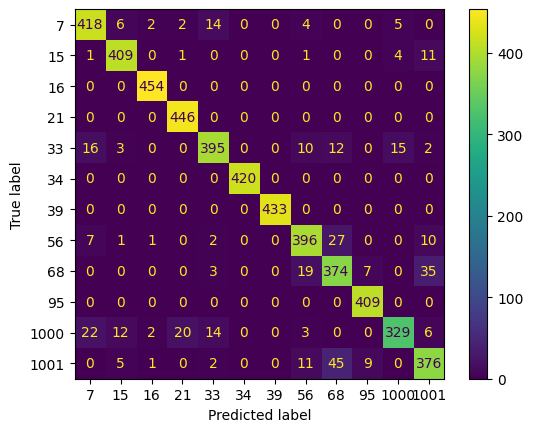

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()